<a href="https://colab.research.google.com/github/luqmnfrhn/FaceMask-Detector/blob/main/wie2003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Obtain Data

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

df = pd.read_csv(io.BytesIO(uploaded['Shopee E-Commerce Shipping Data.csv']))


Scrub or Data Cleaning

In [ ]:
# Basic info
df.info()


# 👀 View the first few rows
print(df.head())

# 🔍 Check missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB
   ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                

In [ ]:
# 🧹 Remove duplicated rows
df = df.drop_duplicates()

# 🪪 Fix column names (replace . with _)
df.columns = df.columns.str.replace('.', '_', regex=False)

In [ ]:
# 📊 Summary
print(df.describe(include='all'))

                 ID Warehouse_block Mode_of_Shipment  Customer_care_calls  \
count   10999.00000           10999            10999         10999.000000   
unique          NaN               5                3                  NaN   
top             NaN               F             Ship                  NaN   
freq            NaN            3666             7462                  NaN   
mean     5500.00000             NaN              NaN             4.054459   
std      3175.28214             NaN              NaN             1.141490   
min         1.00000             NaN              NaN             2.000000   
25%      2750.50000             NaN              NaN             3.000000   
50%      5500.00000             NaN              NaN             4.000000   
75%      8249.50000             NaN              NaN             5.000000   
max     10999.00000             NaN              NaN             7.000000   

        Customer_rating  Cost_of_the_Product  Prior_purchases  \
count     

In [ ]:
#Basic summary statistics
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached_on_Time_Y_N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


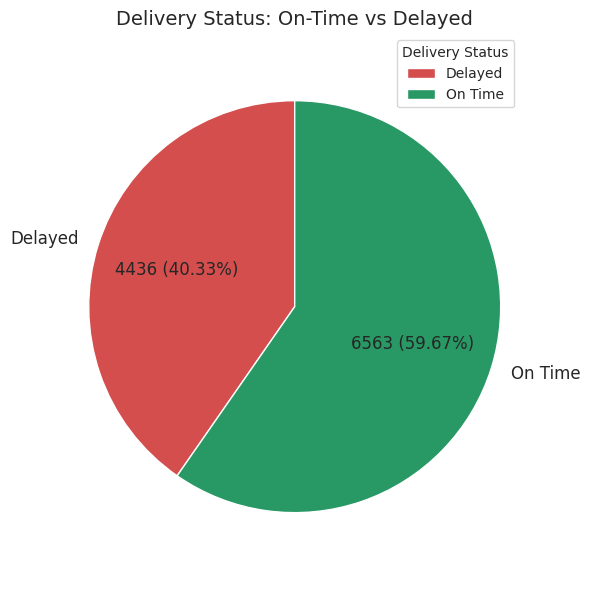

In [ ]:
# Calculate count and percentage of delivery status
delay = df.groupby(['Reached_on_Time_Y_N'])['ID'].count().reset_index()
delay.columns = ['Reached_on_Time_Y_N', 'Count']
delay['Percentage'] = delay['Count'] / len(df) * 100  # Convert to percentage

# Define labels (without count) and colors
labels = delay['Reached_on_Time_Y_N'].map({0: 'Delayed', 1: 'On Time'})
colors = ['#d44e4e', '#289964']  # Red for delay, green for on-time

# Custom function to display count before percentage inside pie chart
def autopct_format(pct, all_vals):
    total = sum(all_vals)  # Get total count
    count = int(round(pct * total / 100))  # Calculate count
    return f"{count} ({pct:.2f}%)"  # Format output

# Plot pie chart
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(
    delay['Percentage'],
    labels=labels,
    colors=colors,
    autopct=lambda pct: autopct_format(pct, delay['Count']),  # Apply function
    startangle=90,
    textprops={'fontsize': 12}
)

# Add legend
plt.legend(patches, labels, title='Delivery Status', loc='best')
plt.title('Delivery Status: On-Time vs Delayed', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()




<ipython-input-11-1136916013>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  visual = sns.barplot(x="Mode_of_Shipment", y="Percentage", data=data_v2, palette="pastel")


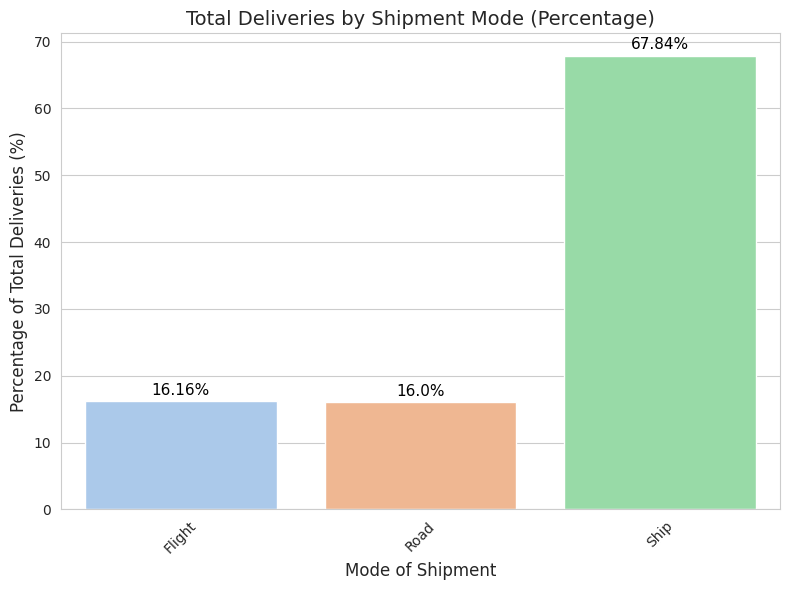

In [ ]:
# Use full dataset (not just delayed deliveries)
data_v1 = df.copy()

# Calculate total deliveries per shipment mode (in percentage)
data_v2 = pd.DataFrame((data_v1.groupby(['Mode_of_Shipment'])['ID'].count()) / len(data_v1) * 100)
data_v2 = data_v2.reset_index()
data_v2.columns = ['Mode_of_Shipment', 'Percentage']

# Create bar plot
plt.figure(figsize=(8, 6))
visual = sns.barplot(x="Mode_of_Shipment", y="Percentage", data=data_v2, palette="pastel")

# Annotate bars
for index, row in data_v2.iterrows():
    visual.text(index, row['Percentage'] + 1, f"{round(row['Percentage'], 2)}%",
                color='black', ha="center", fontsize=11)

# Customize plot
plt.title('Total Deliveries by Shipment Mode (Percentage)', fontsize=14)
plt.xlabel('Mode of Shipment', fontsize=12)
plt.ylabel('Percentage of Total Deliveries (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

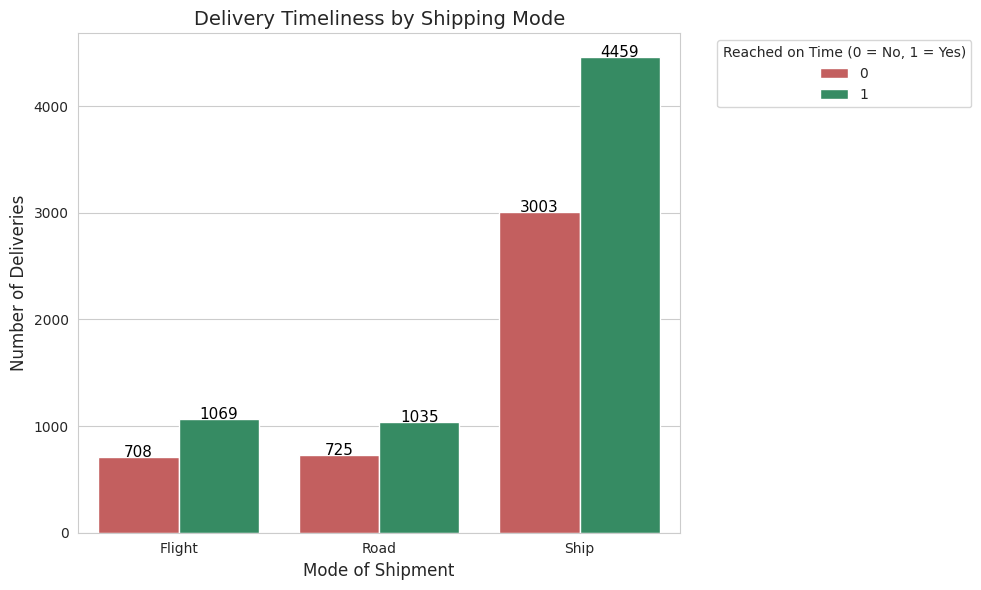

In [ ]:
# Group by Shipment Mode and Delivery Status
data_v2 = df.groupby(['Mode_of_Shipment', 'Reached_on_Time_Y_N'])['ID'].count().reset_index()
data_v2.columns = ['Mode_of_Shipment', 'Reached_on_Time', 'Delivery_Count']

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

visual = sns.barplot(
    x="Mode_of_Shipment",
    y="Delivery_Count",
    hue="Reached_on_Time",
    data=data_v2,
    palette={0: "#d44e4e", 1: "#289964"}  # Red for Delayed, Green for On-Time
)

#count on top of the bar setting
for bar in visual.patches:
    height = bar.get_height()
    if height == 0:
        continue  # Skip annotation if bar height is zero
    x = bar.get_x() + bar.get_width() / 2
    y = height + 1
    visual.text(x=x, y=y, s=int(height), ha='center', fontsize=11, color='black')


# Customize plot
plt.title('Delivery Timeliness by Shipping Mode', fontsize=14)
plt.xlabel('Mode of Shipment', fontsize=12)
plt.ylabel('Number of Deliveries', fontsize=12)
plt.legend(title='Reached on Time (0 = No, 1 = Yes)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

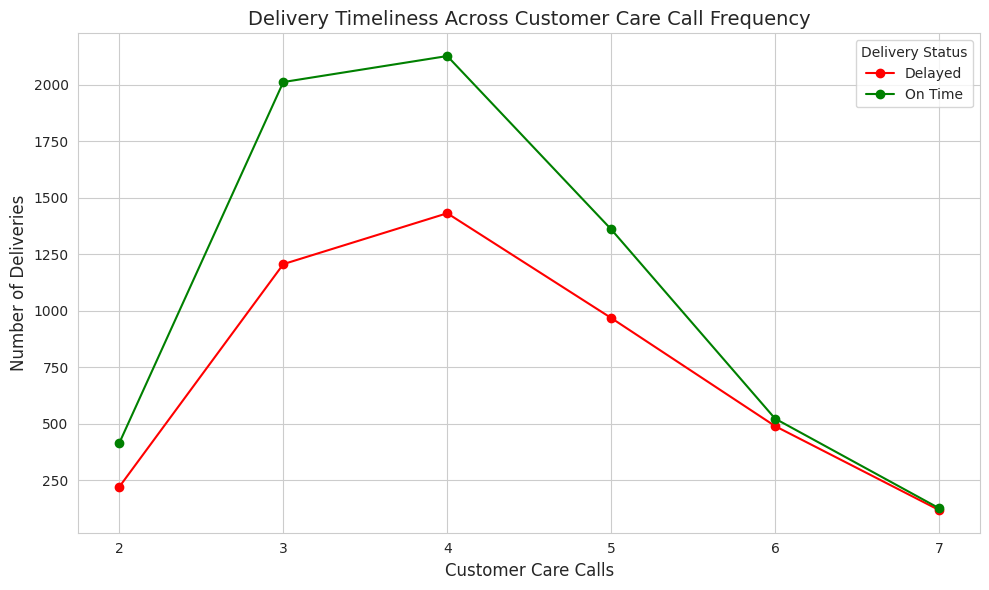

In [ ]:
# Group data by call frequency and delivery status
call_group = df.groupby(['Customer_care_calls', 'Reached_on_Time_Y_N'])['ID'].count().reset_index()
call_group.columns = ['Customer_care_calls', 'Reached_on_Time', 'Delivery_Count']

# Pivot for easier plotting
pivot = call_group.pivot(index='Customer_care_calls', columns='Reached_on_Time', values='Delivery_Count').fillna(0)
pivot.columns = ['Delayed', 'On_Time'] if 0 in pivot.columns else pivot.columns

# ✅ Plot using count
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

plt.plot(pivot.index, pivot['Delayed'], marker='o', label='Delayed', color='red')
plt.plot(pivot.index, pivot['On_Time'], marker='o', label='On Time', color='green')

# Customize plot
plt.title('Delivery Timeliness Across Customer Care Call Frequency', fontsize=14)
plt.xlabel('Customer Care Calls', fontsize=12)
plt.ylabel('Number of Deliveries', fontsize=12)
plt.legend(title='Delivery Status')
plt.xticks(pivot.index)
plt.tight_layout()
plt.show()



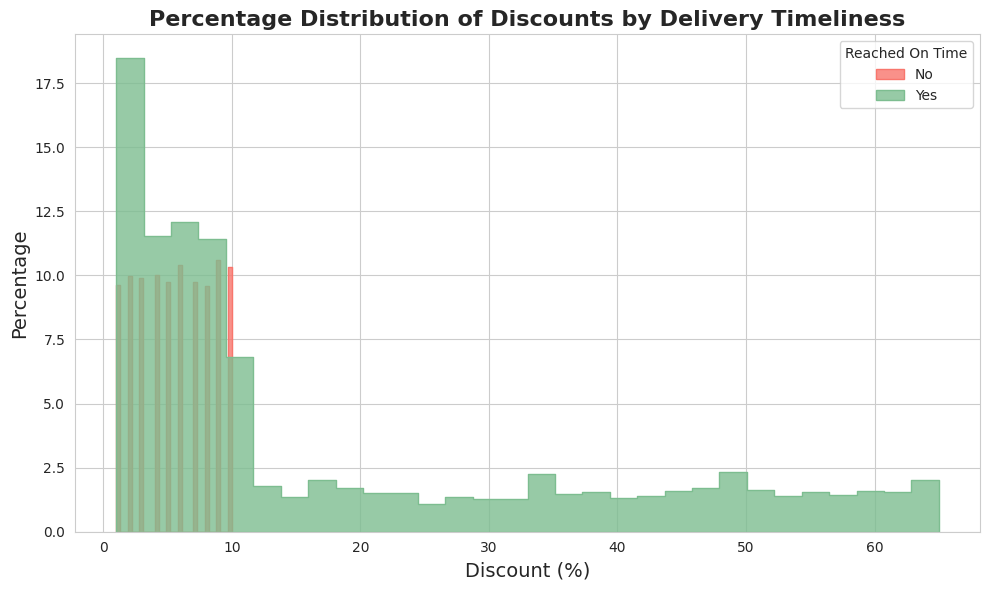

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df[df['Reached_on_Time_Y_N'] == 0],
    x="Discount_offered",
    bins=30,
    stat='percent',
    element='step',
    color='#F8766D',
    alpha=0.8,
    label='No'
)

sns.histplot(
    data=df[df['Reached_on_Time_Y_N'] == 1],
    x="Discount_offered",
    bins=30,
    stat='percent',
    element='step',
    color='#7dbd90',
    alpha=0.8,
    label='Yes'
)

plt.title("Percentage Distribution of Discounts by Delivery Timeliness", fontsize=16, fontweight="bold")
plt.xlabel("Discount (%)", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.legend(title="Reached On Time", labels=["No", "Yes"])
plt.tight_layout()
plt.show()







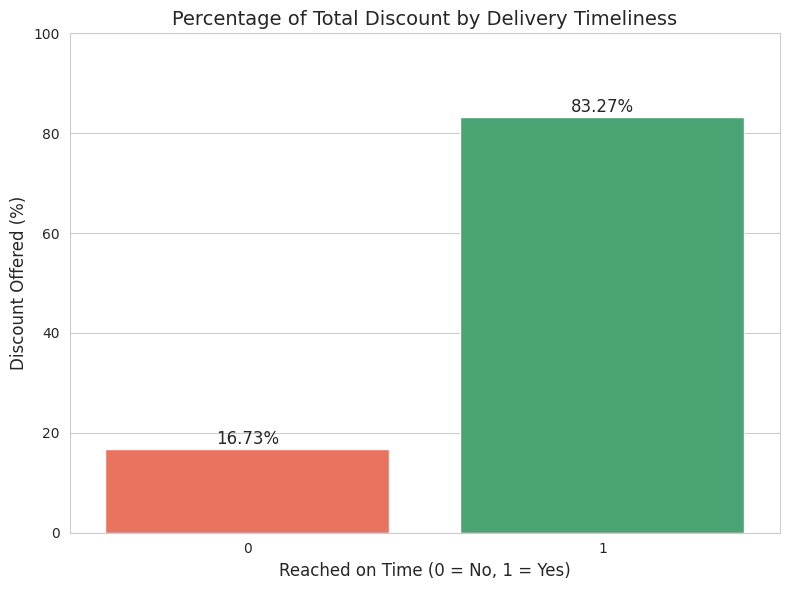

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Group and sum the discounts by delivery status
discount_group = df.groupby('Reached_on_Time_Y_N')['Discount_offered'].sum().reset_index()
discount_group.columns = ['Reached_on_Time', 'Total_Discount']

# Step 2: Calculate percentage
total = discount_group['Total_Discount'].sum()
discount_group['Percentage'] = (discount_group['Total_Discount'] / total) * 100

# Step 3: Plot
plt.figure(figsize=(8, 6))
palette_dict = {0: 'tomato', 1: 'mediumseagreen'}
sns.barplot(x='Reached_on_Time', y='Percentage', hue='Reached_on_Time', data=discount_group,
            palette=palette_dict, legend=False)


# Step 4: Annotate
for index, row in discount_group.iterrows():
    plt.text(index, row.Percentage + 1, f"{row.Percentage:.2f}%", ha='center', fontsize=12)

# Step 5: Customize
plt.title('Percentage of Total Discount by Delivery Timeliness', fontsize=14)
plt.xlabel('Reached on Time (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Discount Offered (%)', fontsize=12)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()



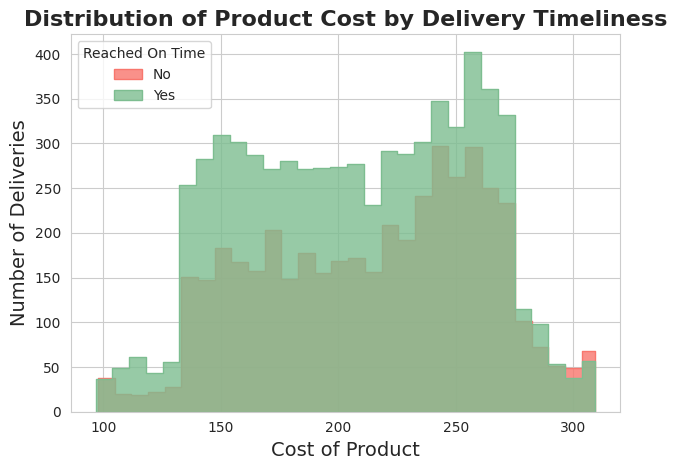

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_style("whitegrid")

# Plot delayed deliveries first (0)
sns.histplot(
    data=df[df['Reached_on_Time_Y_N'] == 0],
    x="Cost_of_the_Product",
    bins=30,
    element='step',
    stat='count',
    color='#F8766D',
    alpha=0.8,
    shrink=0.8,
    label='No'
)

# Then plot on-time deliveries (1) so it's on top
sns.histplot(
    data=df[df['Reached_on_Time_Y_N'] == 1],
    x="Cost_of_the_Product",
    bins=30,
    element='step',
    stat='count',
    color='#7dbd90',
    alpha=0.8,
    shrink=0.8,
    label='Yes'
)

# Customize plot
plt.title("Distribution of Product Cost by Delivery Timeliness", fontsize=16, fontweight="bold")
plt.xlabel("Cost of Product", fontsize=14)
plt.ylabel("Number of Deliveries", fontsize=14)
plt.legend(
    title="Reached On Time",
    labels=["No", "Yes"]
)

plt.tight_layout()
plt.show()



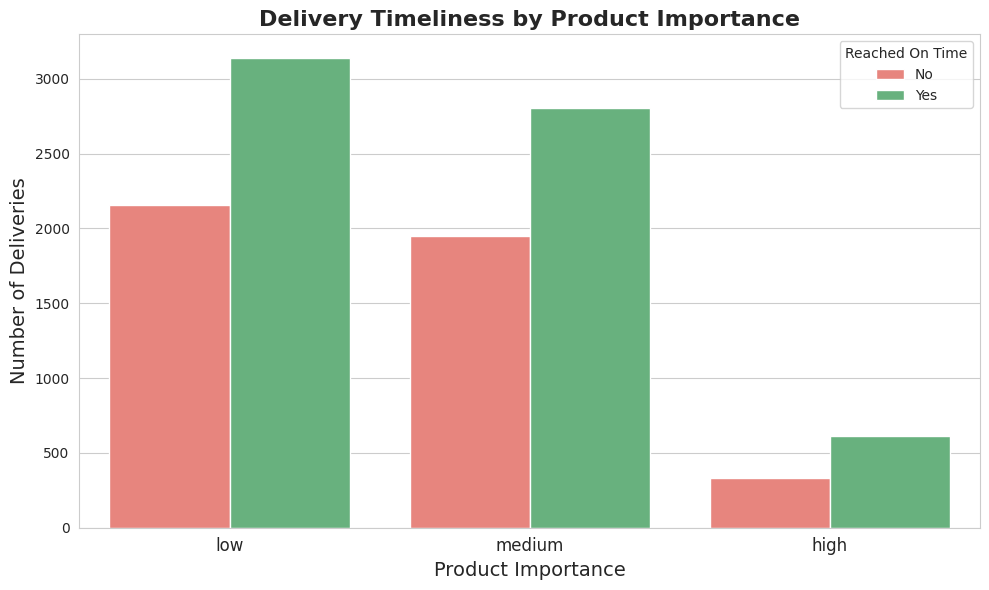

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_style("whitegrid")

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,  # replace with your DataFrame
    x="Product_importance",
    hue="Reached_on_Time_Y_N",
    palette={0: "#F8766D", 1: "#5cbd79"},  # Red for No, Green for Yes
    dodge=True
)

# Customize labels and title
plt.title("Delivery Timeliness by Product Importance", fontsize=16, fontweight="bold")
plt.xlabel("Product Importance", fontsize=14)
plt.ylabel("Number of Deliveries", fontsize=14)
plt.xticks(fontsize=12)
plt.legend(
    title="Reached On Time",
    labels=["No", "Yes"],
    loc="best"
)

# Layout adjustment
plt.tight_layout()
plt.show()


Text(0, 0.5, 'percentage')

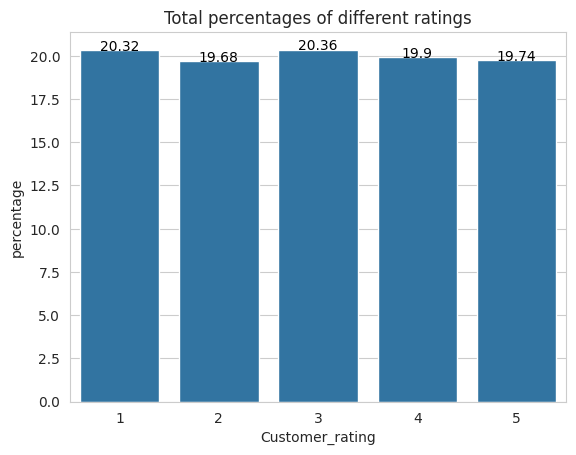

In [ ]:
data_v4=pd.DataFrame((df.groupby(['Customer_rating'])['ID'].count())/len(df)*100)
data_v4=data_v4.reset_index()
visual=sns.barplot(x="Customer_rating", y="ID", data=data_v4 )
for index, row in data_v4.iterrows():
    visual.text(row.name,row.ID, round(row.ID,2), color='black', ha="center")
plt.title('Total percentages of different ratings')
plt.ylabel('percentage')

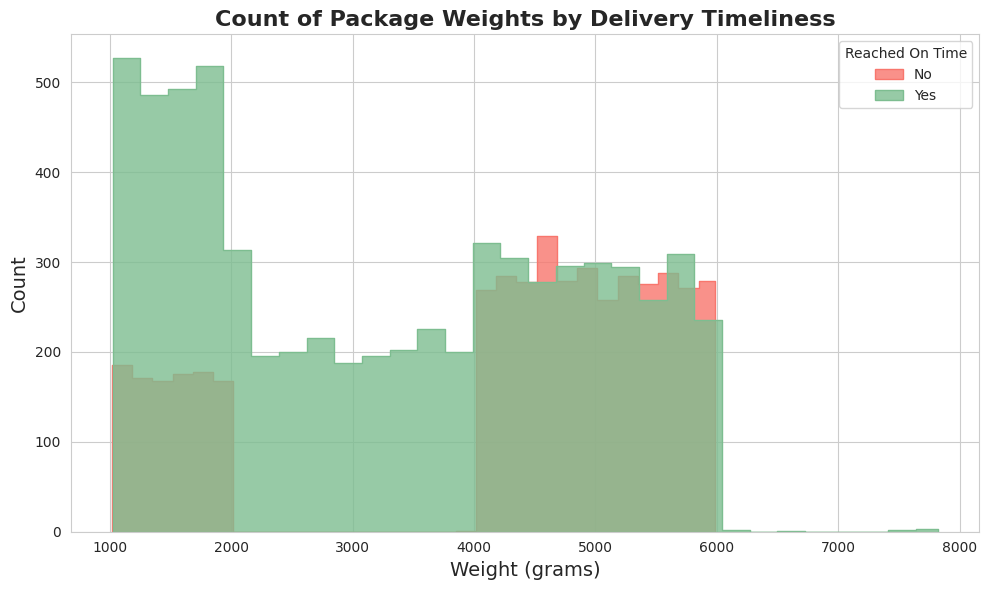

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_style("whitegrid")

# Plot
plt.figure(figsize=(10, 6))

# Plot delayed deliveries first (0)
sns.histplot(
    data=df[df['Reached_on_Time_Y_N'] == 0],
    x="Weight_in_gms",
    bins=30,
    element='step',
    stat='count',
    color='#F8766D',
    alpha=0.8,
    shrink=0.8,
    label='No'
)

# Then plot on-time deliveries (1) so it's on top
sns.histplot(
    data=df[df['Reached_on_Time_Y_N'] == 1],
    x="Weight_in_gms",
    bins=30,
    element='step',
    stat='count',
    color='#7dbd90',
    alpha=0.8,
    shrink=0.8,
    label='Yes'
)

# Customize labels and title
plt.title("Count of Package Weights by Delivery Timeliness", fontsize=16, fontweight="bold")
plt.xlabel("Weight (grams)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(title="Reached On Time")

plt.tight_layout()
plt.show()



Text(0.5, 1.0, 'Customer ratings by Gender')

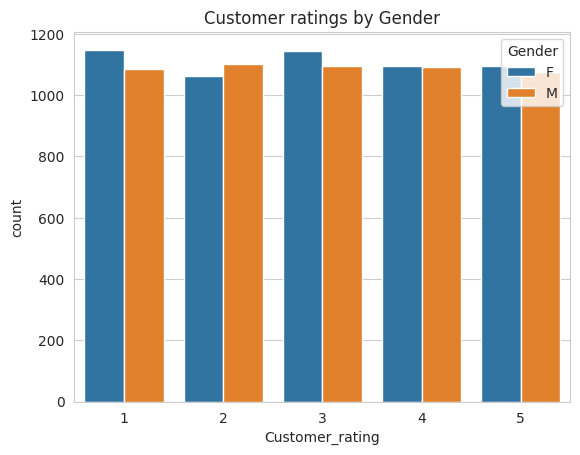

In [ ]:
sns.countplot(x = "Customer_rating", data = df, hue="Gender")
plt.title("Customer ratings by Gender")

Text(0.5, 1.0, 'Amount spent by each Gender')

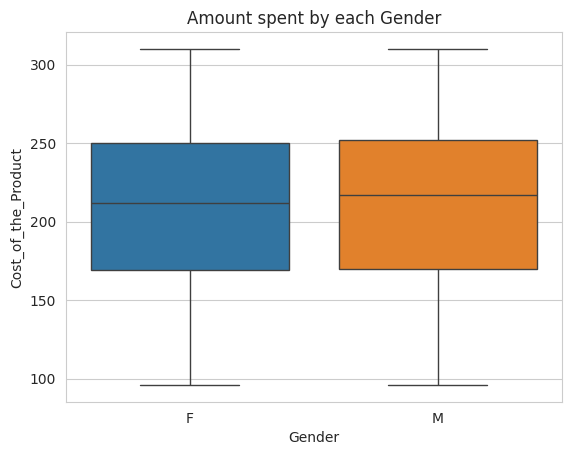

In [ ]:
sns.boxplot(x='Gender',y='Cost_of_the_Product',data=df,hue='Gender')
plt.title("Amount spent by each Gender")

Text(0.5, 1.0, 'Average cost of products of different importance')

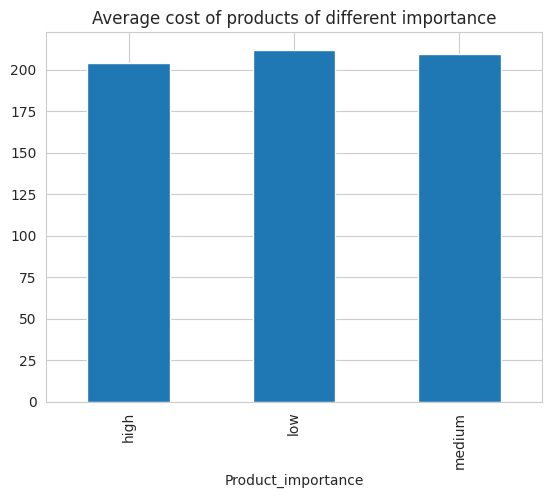

In [ ]:
df.groupby(['Product_importance'])['Cost_of_the_Product'].mean().plot.bar()
plt.title("Average cost of products of different importance")


EDA: Chi Square Test to determine which variables are affecting the Reached On Time Yes or No Variable, remove the unwanted variable if p value greater than 0.05

In [ ]:
from scipy.stats import chi2_contingency
#Mode of Shipment
crossTab = pd.crosstab(df['Mode_of_Shipment'], df['Reached_on_Time_Y_N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1])

p-value  0.6895487627593786


In [ ]:
from scipy.stats import chi2_contingency
#Customer_care_calls
crossTab = pd.crosstab(df['Customer_care_calls'], df['Reached_on_Time_Y_N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1])

p-value  1.8411500205173969e-10


In [ ]:
#Customer_rating
crossTab = pd.crosstab(df['Customer_rating'], df['Reached_on_Time_Y_N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1])

p-value  0.5249236018493662


In [ ]:
#Prior_purchases
crossTab = pd.crosstab(df['Prior_purchases'], df['Reached_on_Time_Y_N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1])

p-value  4.4645971837938025e-24


In [ ]:
#Cost_of_the_Product
crossTab = pd.crosstab(df['Cost_of_the_Product'], df['Reached_on_Time_Y_N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1])

p-value  0.006624116139158186


In [ ]:
#Product_importance
crossTab = pd.crosstab(df['Product_importance'], df['Reached_on_Time_Y_N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1])

p-value  0.002230383104745087


In [ ]:
#Gender
crossTab = pd.crosstab(df['Gender'], df['Reached_on_Time_Y_N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1])

p-value  0.6367032124181522


In [ ]:
#Discount_offered
crossTab = pd.crosstab(df['Discount_offered'], df['Reached_on_Time_Y_N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1])

p-value  0.0


In [ ]:
#Weight_in_gms
crossTab = pd.crosstab(df['Weight_in_gms'], df['Reached_on_Time_Y_N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1])

p-value  3.655331282966219e-17
